# Physics of Magnetic Nozzle

In [1]:
import numpy as np
from nozzle import Params, Nozzle, Spectral
import matplotlib.pyplot as plt

Text(0, 0.5, '$B$')

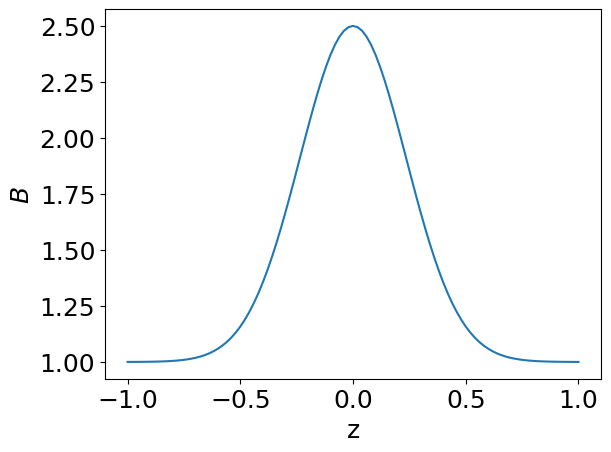

In [2]:
# magnetic field
spectral = Spectral(101, "symmetric", "FD")
params = Params(Mm=0.5, constant_v=False)
B0 = params.B0
R = params.R
Bm = params.Bm
Delta = params.Delta 

x = spectral.x
B = B0*(1+R*np.exp(-(x/Delta)**2))
plt.plot(x,B)
plt.xlabel("z")
plt.ylabel("$B$")

Text(0.5, 1.0, 'velocity profile')

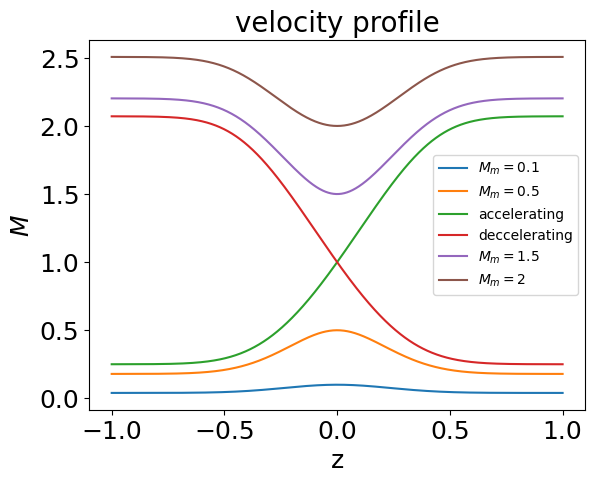

In [7]:
params_list = [
    Params(Mm=0.1, constant_v=False),
    Params(Mm=0.5, constant_v=False),
    Params(Mm=1, accelerating=True),
    Params(Mm=1, accelerating=False),
    Params(Mm=1.5, constant_v=False),
    Params(Mm=2, constant_v=False)
]
x = np.linspace(-1,1,1001)
for params in params_list:
    nozzle = Nozzle(params, x)
    if params.accelerating == True:
        label = "accelerating"
    elif params.accelerating == False:
        label = "deccelerating"
    else: # paras.accelerating is None
        label = f"$M_m={params.Mm}$"
    plt.plot(x, nozzle.v0, label=label)
plt.legend(fontsize="medium")
plt.xlabel("z")
plt.ylabel("$M$")
plt.title("velocity profile")